Name : Dwi Fitria Astari Lubis

Prodigy_DS_02

Task 2
Perform data cleaning and EDA on a dataset. Explore the relationship between variables and identify patterns and trends in the data.

Sample Dataset: https://www.kaggle.com/c/titanic/data

Understanding the Titanic Dataset

The Titanic dataset is a classic introductory machine learning problem where the goal is to predict passenger survival based on various factors like age, sex, class, etc. It's a great dataset to start exploring data analysis and visualization techniques.

There are 3 files in titanic datasets:

The training set (train.csv)should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set (test.csv) should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

In [1]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load datasets
train_df = pd.read_csv("C:\\Users\\Dwi Fitria\\Intern\\PRODIGY_DS_Aug2024\\PRODIGY_DS_Aug2024\\titanic\\train.csv")
test_df = pd.read_csv("C:\\Users\\Dwi Fitria\\Intern\\PRODIGY_DS_Aug2024\\PRODIGY_DS_Aug2024\\titanic\\test.csv")
gs_df = pd.read_csv("C:\\Users\\Dwi Fitria\\Intern\\PRODIGY_DS_Aug2024\\PRODIGY_DS_Aug2024\\titanic\\gender_submission.csv")


In [3]:
print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
print(test_df.shape)
test_df.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


From this 3 files, we know that PassengerId 1-891 in file train.csv
PassengerID 892-1309 in file test.csv and gender_submission.csv give the info of survived from test.csv
I combined data via excel using vlookup

In [7]:
#Load dataset training set
print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
#data type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The columns for Age, Cabin, and Embark do not contain complete data.
Age should be an int64, however, in this data it is represented as float64 due to the presence of decimals. We need to evaluate whether to exclude this data or not.

In [10]:
#check missing velues
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

there are 2 column missing, age and cabin. we need to drop column cabin because there are a lot of missing values.
we need to change missing values of age with median age

In [11]:
#drop cabin column
train_df.drop('Cabin', axis=1,inplace=True)

In [28]:
#fill missing values of age with median
median_age = train_df['Age'].median()
train_df['Age'].fillna ('median_age',inplace=True)

In [12]:
#check duplicate data
print(train_df.duplicated().sum())
train_df.drop_duplicates(inplace=True)
print(train_df.duplicated().sum())
print(train_df.shape)

0
0
(891, 11)


In [13]:
#summary statistics for numerical columns using 
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#the clean data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


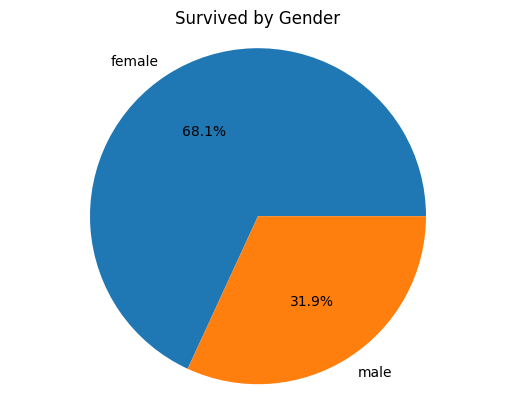

In [15]:
#Visualization data and analysis
# Group data by gender and calculate survival counts
survived_by_gender = train_df.groupby('Sex')['Survived'].sum()
plt.pie(survived_by_gender, labels=survived_by_gender.index,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Survived by Gender")
plt.show()

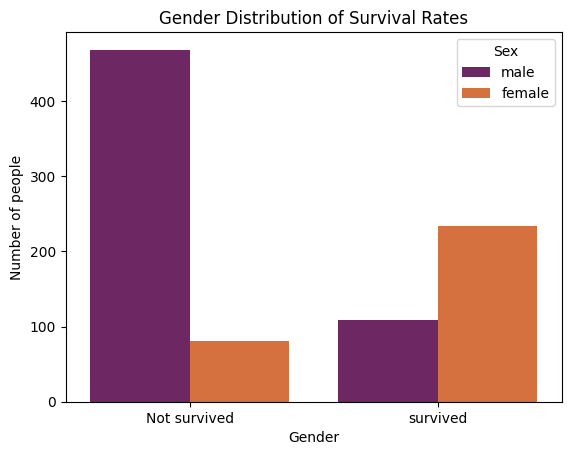

In [33]:
sns.countplot(x='Survived',hue='Sex',data=train_df,palette='inferno',)
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.title('Gender Distribution of Survival Rates')
plt.show()

Female survival percentage is bigger than male survival

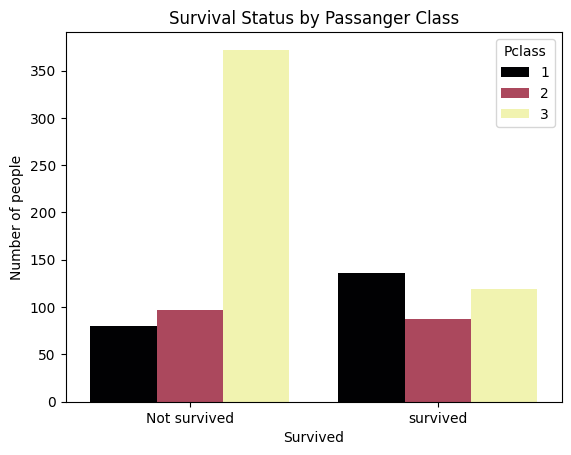

In [35]:
#Survival Status by Class
sns.countplot(x='Survived',hue='Pclass',data=train_df,palette='inferno',)
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.title('Survival Status by Passanger Class')
plt.show()

First class has the largest survival by number, and the third class has the largest non-survival by number.

Text(0.5, 1.0, 'Age Distribution of survival')

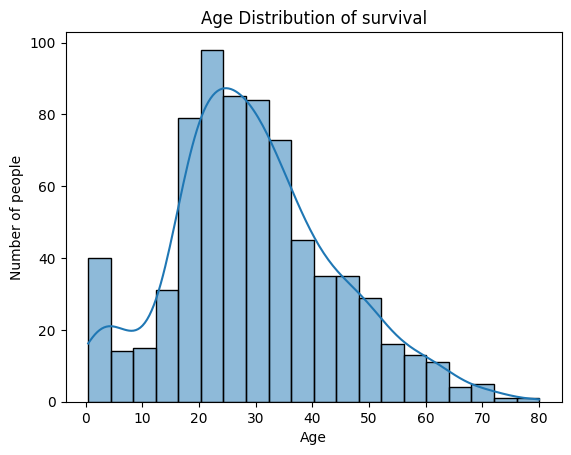

In [37]:
#Age Distribution
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title('Age Distribution of survival')

the range of high survival rate : age 15-40 (productive age)

Text(0.5, 1.0, 'Fare Distribution of passanger')

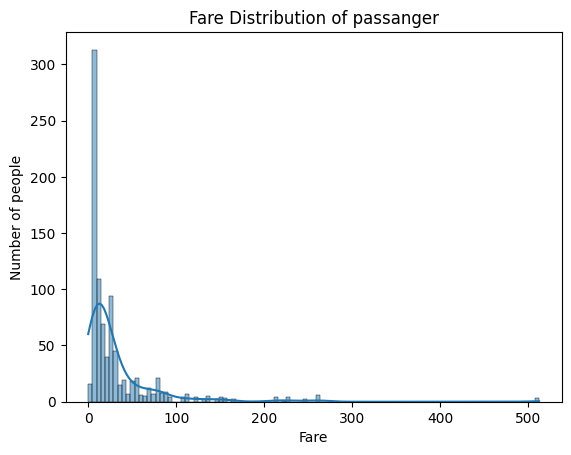

In [38]:
#Fare Distribution
sns.histplot(train_df['Fare'], kde=True)
plt.xlabel("Fare")
plt.ylabel("Number of people")
plt.title('Fare Distribution of passanger')

Most people paid lower fares, as indicated by the high bars near the lower end of the fare range.

<Axes: xlabel='Survived', ylabel='Age'>

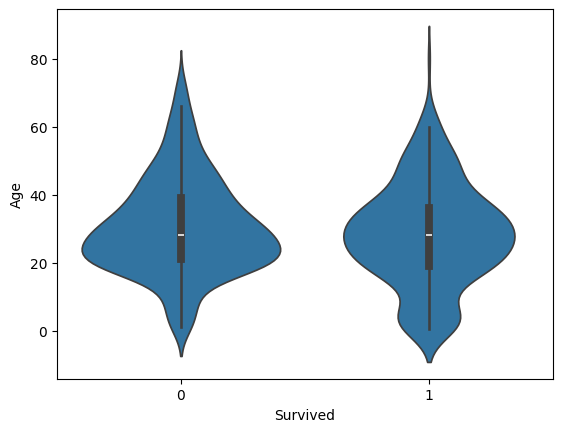

In [25]:
#Survival rate by Age
sns.violinplot(x='Survived', y='Age', data=train_df)

the plot shows that the significant number of middle-aged individuals did not survived. The age distribution for survivors is more evenly spread across different ages, with a slightly higher median age compared to non-survivors. This indicates that survival rates were more balanced across various age groups.